**Задание 1**

Импортируйте библиотеки pandas, numpy и matplotlib.
Загрузите "Boston House Prices dataset" из встроенных наборов данных библиотеки sklearn.
Создайте датафреймы X и y из этих данных.

Разбейте эти датафреймы на тренировочные (X_train, y_train) и тестовые (X_test, y_test)
с помощью функции train_test_split так, чтобы размер тестовой выборки
составлял 20% от всех данных, при этом аргумент random_state должен быть равен 42.

Масштабируйте данные с помощью StandardScaler.

Постройте модель TSNE на тренировочный данных с параметрами:
n_components=2, learning_rate=250, random_state=42.

Постройте диаграмму рассеяния на этих данных.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE

In [2]:
# Загрузка файла
data = pd.read_csv('/content/sample_data/BostonHousing.csv')

In [3]:
data.head(10)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311,15.2,386.71,17.10,18.9


In [4]:
# Создание датафреймов X и y
X = data.drop('medv', axis=1)
y = data['medv']


In [5]:
# Разбивка данных на тренировочные и тестовые
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
# Масштабирование данных
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [7]:
# Построение модели TSNE
tsne = TSNE(n_components=2, learning_rate=250, random_state=42)
X_train_tsne = tsne.fit_transform(X_train_scaled)

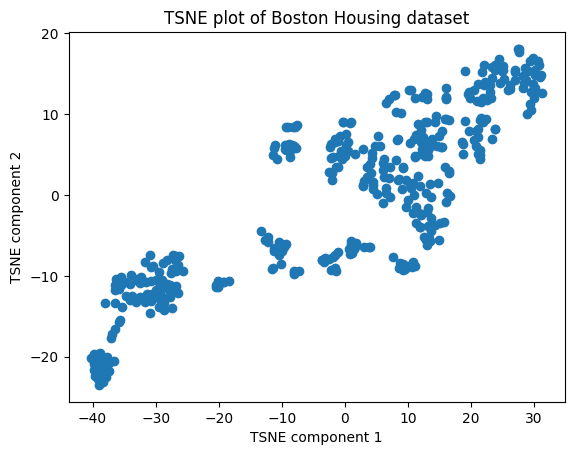

In [8]:
# Построение диаграммы рассеяния
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1])
plt.title('TSNE plot of Boston Housing dataset')
plt.xlabel('TSNE component 1')
plt.ylabel('TSNE component 2')
plt.show()

**Задание 2**

С помощью KMeans разбейте данные из тренировочного набора на 3 кластера,
используйте все признаки из датафрейма X_train.
Параметр max_iter должен быть равен 100, random_state сделайте равным 42.

Постройте еще раз диаграмму рассеяния на данных, полученных с помощью TSNE,
и раскрасьте точки из разных кластеров разными цветами.

Вычислите средние значения price и CRIM в разных кластерах.


In [10]:
from sklearn.cluster import KMeans

In [11]:
# KMeans кластеризация
kmeans = KMeans(n_clusters=3, max_iter=100, random_state=42)
clusters = kmeans.fit_predict(X_train_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


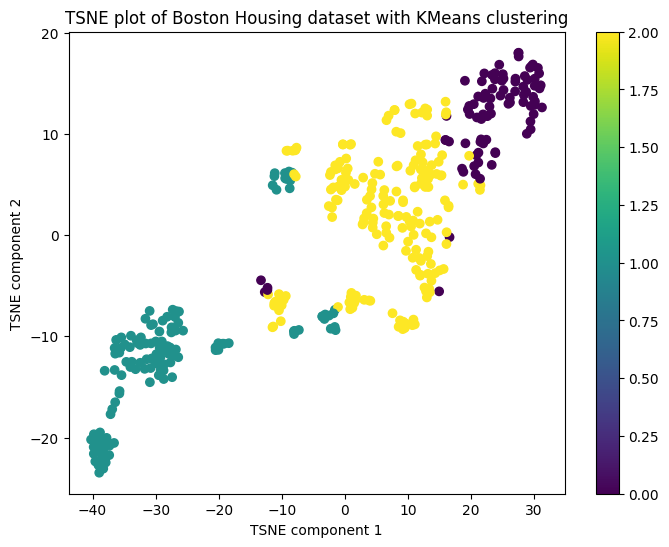

In [12]:
# Построение диаграммы рассеяния на данных TSNE с раскраской по кластерам
plt.figure(figsize=(8, 6))
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=clusters, cmap='viridis')
plt.title('TSNE plot of Boston Housing dataset with KMeans clustering')
plt.xlabel('TSNE component 1')
plt.ylabel('TSNE component 2')
plt.colorbar()
plt.show()


In [14]:
# Вычисление средних значений price и CRIM в разных кластерах
data_train = X_train.copy()
data_train['Cluster'] = clusters
data_train['PRICE'] = y_train

means = data_train.groupby('Cluster').agg({'PRICE': 'mean', 'crim': 'mean'})
print(means)

             PRICE       crim
Cluster                      
0        27.788372   0.073566
1        16.165354  10.797028
2        24.958115   0.421660


**Задание 3**

Примените модель KMeans, построенную в предыдущем задании,
к данным из тестового набора.


In [15]:
# Применение модели KMeans к данным из тестового набора
clusters_test = kmeans.predict(X_test_scaled)

In [16]:
# Вывод результатов
data_test = X_test.copy()
data_test['Cluster'] = clusters_test

In [17]:
# Вывод уникальных значений кластеров в тестовом наборе
print(data_test['Cluster'].unique())

[2 0 1]


In [18]:
# Вывод первых нескольких строк тестового набора с информацией о кластерах
print(data_test.head())

        crim    zn  indus  chas    nox     rm   age     dis  rad  tax  \
173  0.09178   0.0   4.05     0  0.510  6.416  84.1  2.6463    5  296   
274  0.05644  40.0   6.41     1  0.447  6.758  32.9  4.0776    4  254   
491  0.10574   0.0  27.74     0  0.609  5.983  98.8  1.8681    4  711   
72   0.09164   0.0  10.81     0  0.413  6.065   7.8  5.2873    4  305   
452  5.09017   0.0  18.10     0  0.713  6.297  91.8  2.3682   24  666   

     ptratio       b  lstat  Cluster  
173     16.6  395.50   9.04        2  
274     17.6  396.90   3.53        0  
491     20.1  390.11  18.07        1  
72      19.2  390.91   5.52        2  
452     20.2  385.09  17.27        1  
